In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [11]:
df = pd.read_excel('Flight_Price_dataset.xlsx')
df

,Unnamed: 0,Airline,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Go First,G8-2501,"Mon, 19 Sep 2022",02:40,04:50,New Delhi,Mumbai,Non Stop,2h 10m,5950
1,1,Go First,G8-336,"Mon, 19 Sep 2022",14:30,16:40,New Delhi,Mumbai,Non Stop,2h 10m,5950
2,2,SpiceJet,SG-8709,"Mon, 19 Sep 2022",19:00,21:10,New Delhi,Mumbai,Non Stop,2h 10m,5950
3,3,Go First,G8-330,"Mon, 19 Sep 2022",20:50,23:00,New Delhi,Mumbai,Non Stop,2h 10m,5950
4,4,Go First,G8-323,"Mon, 19 Sep 2022",18:20,20:35,New Delhi,Mumbai,Non Stop,2h 15m,5950
...,...,...,...,...,...,...,...,...,...,...,...
2121,2121,Vistara,UK-622/949/926,"Thu, 22 Sep 2022",16:10,08:20\n+ 1 day,Varanasi,New Delhi,2 Stop(s),16h 10m,11975
2122,2122,Vistara,UK-622/919/966,"Thu, 22 Sep 2022",16:10,22:00\n+ 1 day,Varanasi,New Delhi,2 Stop(s),29h 50m,11975
2123,2123,Vistara,UK-622/949/966,"Thu, 22 Sep 2022",16:10,22:00\n+ 1 day,Varanasi,New Delhi,2 Stop(s),29h 50m,11975
2124,2124,Vistara,UK-622/653/707,"Thu, 22 Sep 2022",16:10,16:30\n+ 1 day,Varanasi,New Delhi,2 Stop(s),24h 20m,12287


In [12]:
df.drop(columns='Unnamed: 0', inplace =True)

In [13]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Price'], object: ['Airline', 'Aeroplane', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

# Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         2126 non-null   object
 1   Aeroplane       2126 non-null   object
 2   Date            2126 non-null   object
 3   Departure_Time  2126 non-null   object
 4   Arrival_Time    2126 non-null   object
 5   Source          2126 non-null   object
 6   Destination     2126 non-null   object
 7   Stops           2126 non-null   object
 8   Duration        2126 non-null   object
 9   Price           2126 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 166.2+ KB


In [15]:
df.isnull().sum()

Airline           0
Aeroplane         0
Date              0
Departure_Time    0
Arrival_Time      0
Source            0
Destination       0
Stops             0
Duration          0
Price             0
dtype: int64

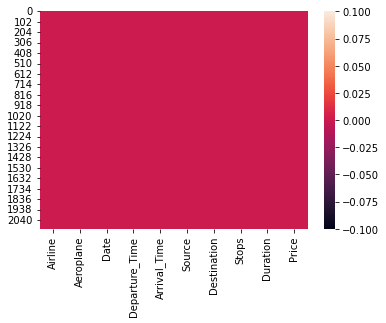

In [16]:
sns.heatmap(df.isnull());

In [17]:
df.nunique()

Airline             6
Aeroplane         283
Date               12
Departure_Time    123
Arrival_Time      165
Source              2
Destination         2
Stops               4
Duration          159
Price             329
dtype: int64

In [18]:
for i in df.columns:
    print(df[i].value_counts())
    print('______________________*****_________________________')

IndiGo       551
Air India    547
Vistara      522
Go First     206
SpiceJet     200
Air Asia     100
Name: Airline, dtype: int64
______________________*****_________________________
UK-969/918        12
6E-2033/605       12
AI-433/634        12
UK-969/936        12
6E-607/6004       12
                  ..
UK-611/648         1
UK-643/648         1
SG-2969/386        1
UK-859/872         1
UK-622/653/638     1
Name: Aeroplane, Length: 283, dtype: int64
______________________*****_________________________
Tue, 20 Sep 2022    200
Mon, 19 Sep 2022    197
Wed, 21 Sep 2022    194
Thu, 22 Sep 2022    194
Sat, 24 Sep 2022    173
Fri, 23 Sep 2022    171
Fri, 30 Sep 2022    170
Mon, 26 Sep 2022    169
Tue, 27 Sep 2022    168
Thu, 29 Sep 2022    165
Wed, 28 Sep 2022    164
Sun, 25 Sep 2022    161
Name: Date, dtype: int64
______________________*****_________________________
07:20    78
06:30    65
10:45    61
13:25    57
09:45    50
         ..
19:15     1
17:30     1
18:25     1
07:40     1
07:5

# Data Cleaning:

In [19]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]     

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 



In [20]:
df['Duration_hours'] = duration_hours
df['Duration_min'] = duration_mins

df.drop('Duration',axis=1,inplace=True)



In [21]:
df['Departure_Hour'] = pd.to_datetime(df['Departure_Time']).dt.hour

# Extracting Minutes from Dep_Time column
df['Departure_Min'] = pd.to_datetime(df['Departure_Time']).dt.minute

df.drop('Departure_Time',axis = 1,inplace=True)



In [22]:
arrival = list(df['Arrival_Time']) 
arrival_time = []

for i in range(len(arrival)):
    if len(arrival[i].split('\n')):
        arrival_time.append(arrival[i][0:5])

df['Arrival_time'] = arrival_time



In [23]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_time"]).dt.hour

# Extracting Minutes from Arrival_Time column
df["Arrival_Min"] = pd.to_datetime(df["Arrival_time"]).dt.minute

# Dropping Arrival_Time column
df.drop("Arrival_time",axis=1,inplace=True)



In [24]:
df.drop('Arrival_Time',axis= 1,inplace=True)



In [25]:
df['Day']= df['Date'].map(lambda x :x[:3])



In [26]:
df['Date']= df['Date'].map(lambda x :x[4:])

In [27]:
df.drop("Aeroplane",axis=1,inplace=True)
df

,Airline,Date,Source,Destination,Stops,Price,Duration_hours,Duration_min,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Day
0,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,2,40,4,50,Mon
1,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,14,30,16,40,Mon
2,SpiceJet,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,19,0,21,10,Mon
3,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,20,50,23,0,Mon
4,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,15,18,20,20,35,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),11975,16,10,16,10,8,20,Thu
2122,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),11975,29,50,16,10,22,0,Thu
2123,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),11975,29,50,16,10,22,0,Thu
2124,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),12287,24,20,16,10,16,30,Thu


# Statistical

In [28]:
df.describe()

,Price,Duration_hours,Duration_min,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
count,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000
mean,9065.205550,8.530103,23.730009,12.80809,26.639229,14.057385,23.925212
std,2945.314519,6.858076,16.898605,5.48185,17.021955,6.465001,17.305818
min,5432.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6250.000000,2.000000,10.000000,8.00000,10.000000,9.000000,10.000000
50%,8579.500000,6.000000,20.000000,13.00000,30.000000,15.000000,20.000000
75%,10470.000000,12.000000,40.000000,17.00000,45.000000,19.000000,40.000000
max,34098.000000,29.000000,55.000000,23.00000,55.000000,23.000000,55.000000


In [29]:
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
        
        
print('Categorical Columns \n',cat_col)
print('Numerical Columns \n',num_col)



Categorical Columns 
 ['Airline', 'Date', 'Source', 'Destination', 'Stops', 'Day']
Numerical Columns 
 ['Price', 'Duration_hours', 'Duration_min', 'Departure_Hour', 'Departure_Min', 'Arrival_Hour', 'Arrival_Min']


# Data Visualization:

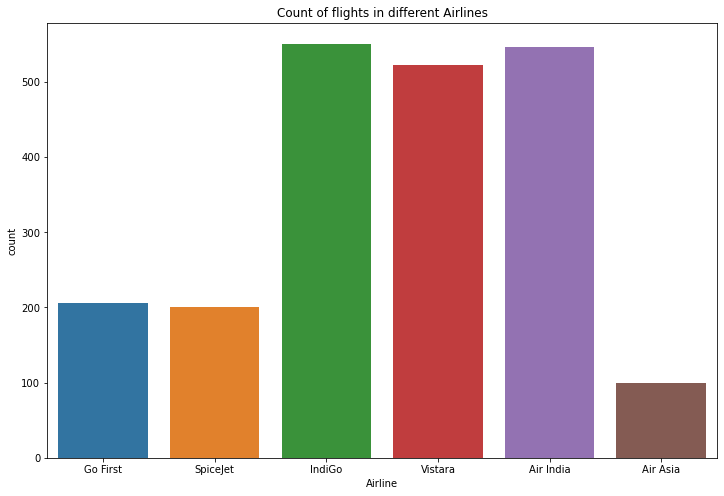

In [30]:
plt.figure(figsize =(12,8))
sns.countplot(df['Airline'])
plt.title('Count of flights in different Airlines');

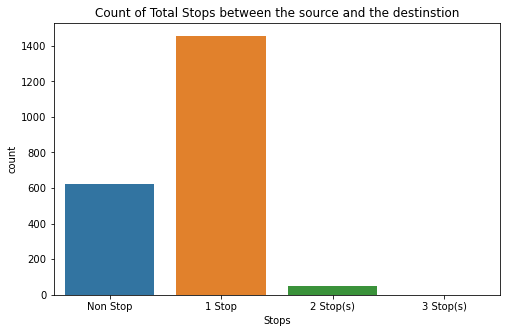

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(df['Stops'])
plt.title('Count of Total Stops between the source and the destinstion');

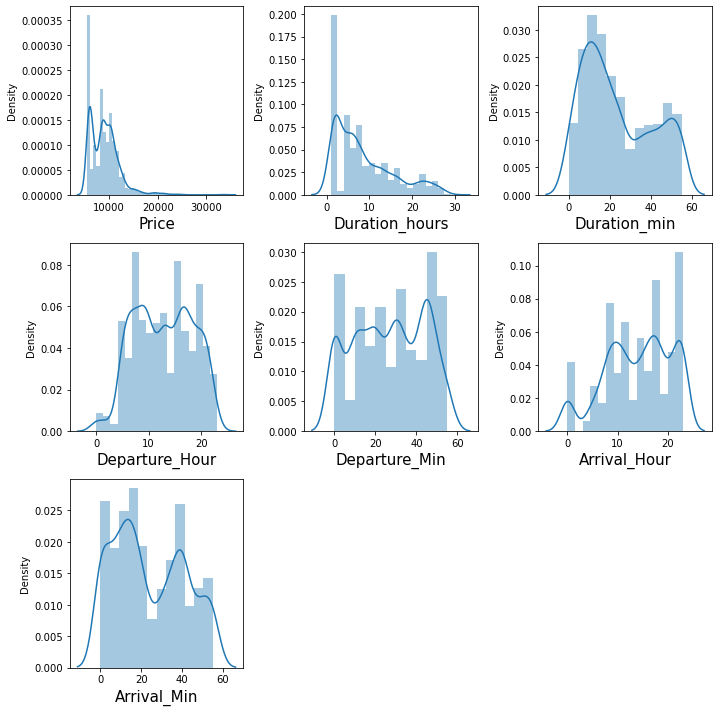

In [32]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber = 1
for column in num_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

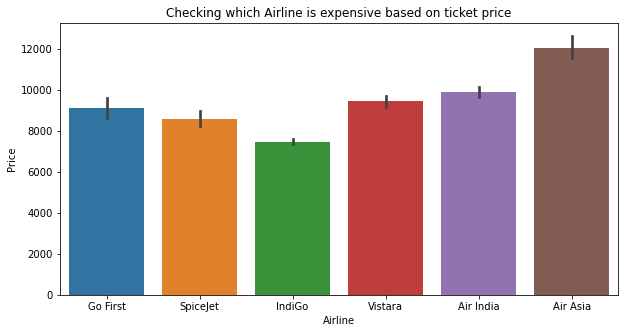

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(df['Airline'],df['Price'],data=df)
plt.title('Checking which Airline is expensive based on ticket price')
plt.show()

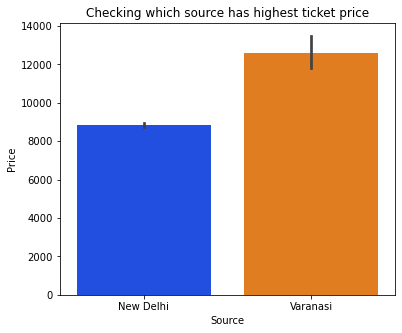

In [34]:
plt.figure(figsize=(6,5))
sns.barplot(df['Source'],df['Price'],data=df,palette='bright')
plt.title('Checking which source has highest ticket price')
plt.show()

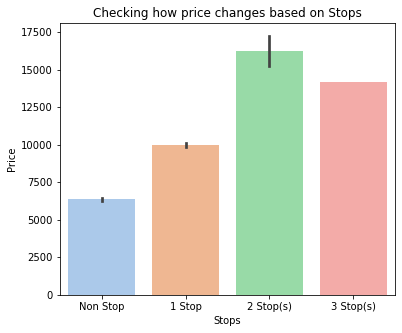

In [35]:
plt.figure(figsize=(6,5))
sns.barplot(df['Stops'],df['Price'],data=df,palette='pastel')
plt.title("Checking how price changes based on Stops")
plt.show()

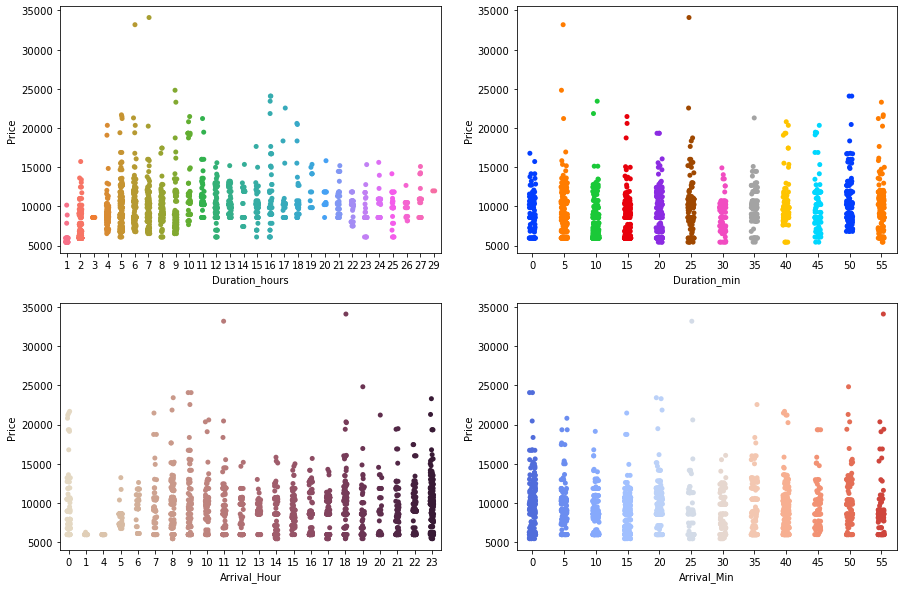

In [36]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

sns.stripplot(x='Duration_hours',y='Price',ax=axes[0,0],data=df,palette="husl")

sns.stripplot(x='Duration_min',y='Price',ax=axes[0,1],data=df,palette="bright")

sns.stripplot(x='Arrival_Hour',y='Price',ax=axes[1,0],data=df, palette="ch:.28")

sns.stripplot(x='Arrival_Min',y='Price',ax=axes[1,1],data=df,palette="coolwarm")
plt.show()

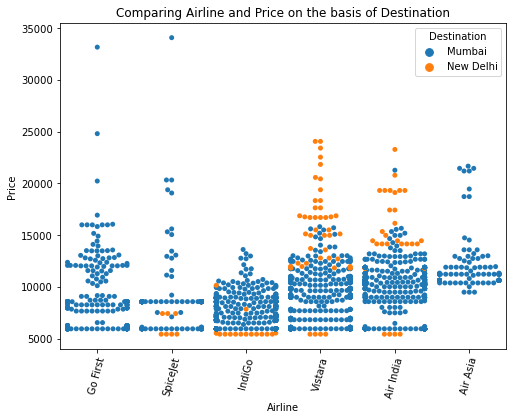

In [37]:
plt.figure(figsize=(8,6))
sns.swarmplot(x=df['Airline'],y=df['Price'],hue=df["Destination"])
plt.title("Comparing Airline and Price on the basis of Destination")
plt.xticks(rotation=75)
plt.show()

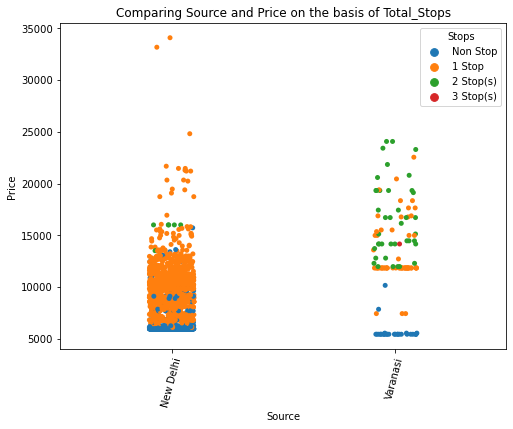

In [38]:
plt.figure(figsize=(8,6))
sns.stripplot(x=df['Source'],y=df['Price'],hue=df['Stops'])
plt.title("Comparing Source and Price on the basis of Total_Stops")
plt.xticks(rotation=75)
plt.show()

# MultiVariate Analysis:

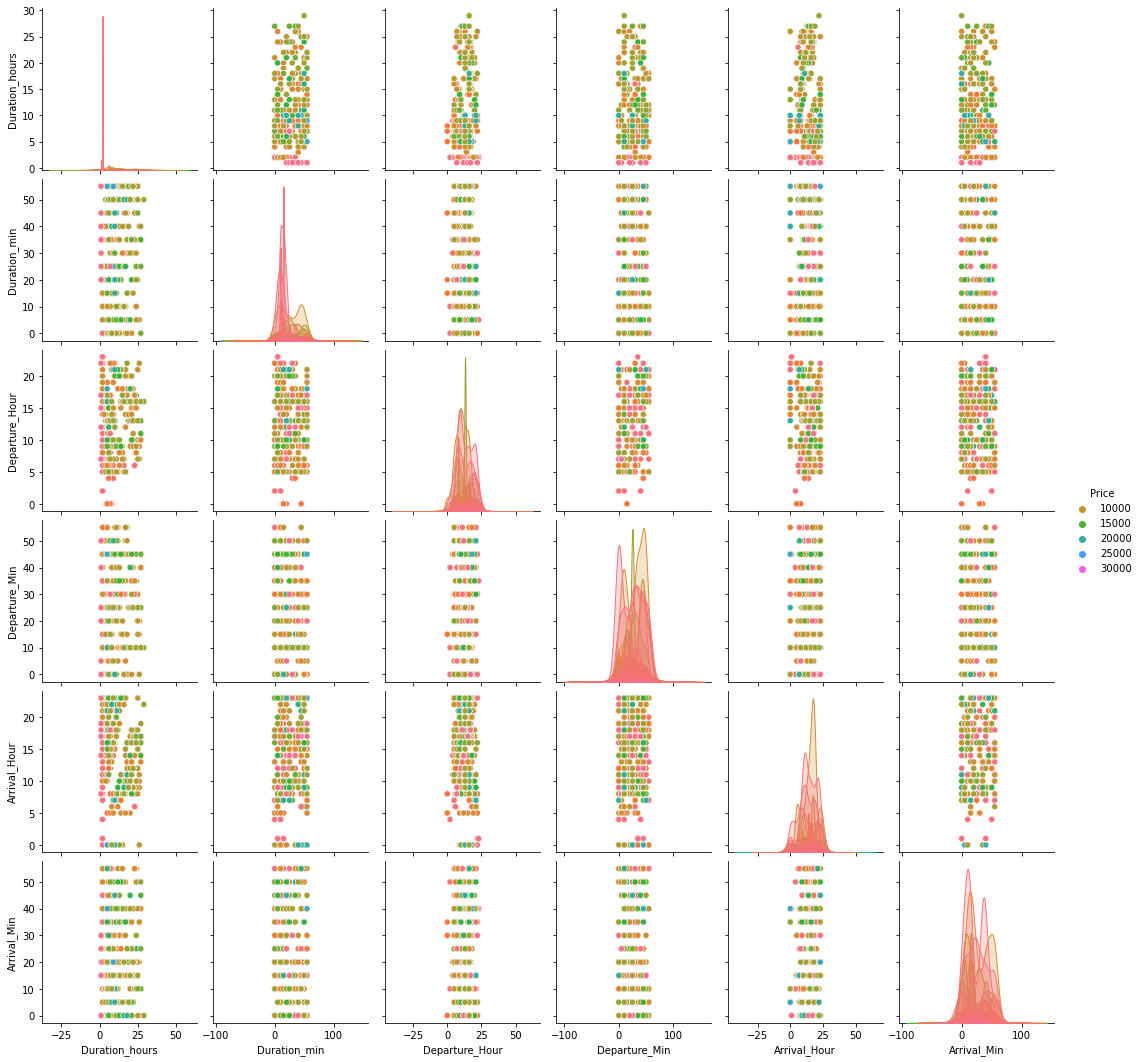

In [39]:
sns.pairplot(df,hue='Price',palette='husl')
plt.show()

# Identifying the outliers:

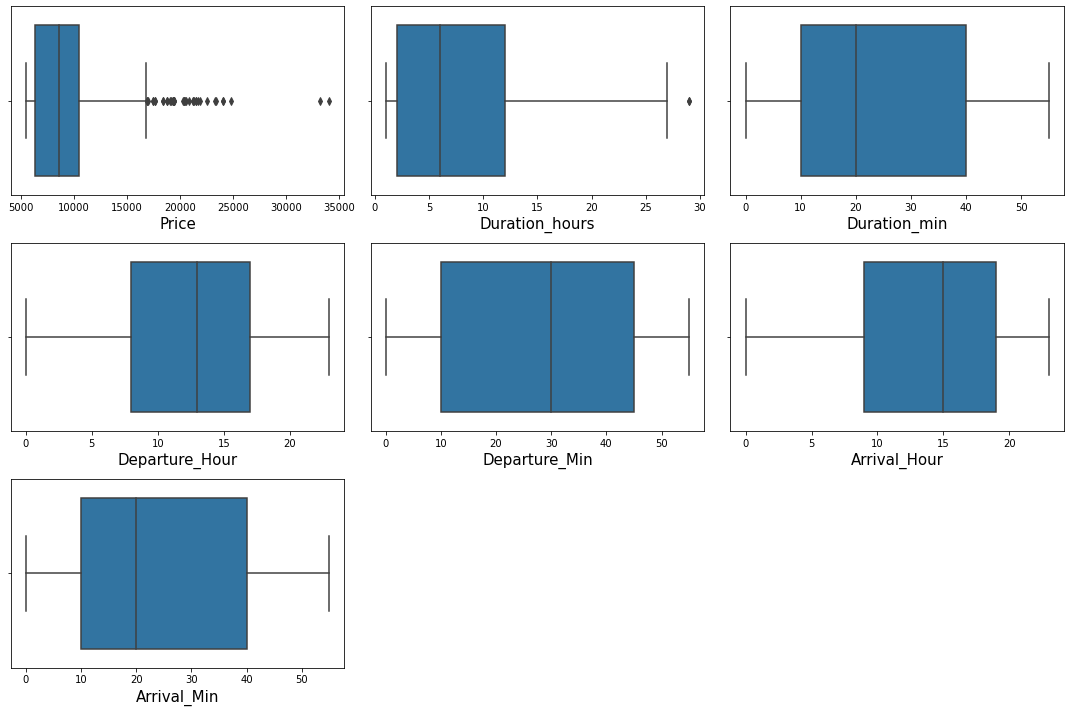

In [40]:
plt.figure(figsize=(15,10))
plotnumber = 1
for column in num_col:
    if plotnumber<=7:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Removing Outliers: 

In [41]:
feature = df[['Duration_hours']]

import scipy as ststa
from scipy.stats import zscore
z=np.abs(zscore(feature))
z

,Duration_hours
0,0.952401
1,0.952401
2,0.952401
3,0.952401
4,0.952401
...,...
2121,1.089468
2122,2.985489
2123,2.985489
2124,2.256250


In [42]:
new_df = df[(z<3).all(axis=1)]
new_df

,Airline,Date,Source,Destination,Stops,Price,Duration_hours,Duration_min,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Day
0,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,2,40,4,50,Mon
1,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,14,30,16,40,Mon
2,SpiceJet,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,19,0,21,10,Mon
3,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,10,20,50,23,0,Mon
4,Go First,19 Sep 2022,New Delhi,Mumbai,Non Stop,5950,2,15,18,20,20,35,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),11975,16,10,16,10,8,20,Thu
2122,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),11975,29,50,16,10,22,0,Thu
2123,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),11975,29,50,16,10,22,0,Thu
2124,Vistara,22 Sep 2022,Varanasi,New Delhi,2 Stop(s),12287,24,20,16,10,16,30,Thu


In [43]:
new_df.skew().sort_values()

Arrival_Hour     -0.400387
Departure_Min    -0.068440
Departure_Hour   -0.053185
Arrival_Min       0.263197
Duration_min      0.473029
Duration_hours    1.029288
Price             1.763416
dtype: float64

In [44]:
new_df['Duration_hours'] = np.log1p(new_df['Duration_hours'])

In [45]:
new_df.skew().sort_values()

Arrival_Hour     -0.400387
Departure_Min    -0.068440
Departure_Hour   -0.053185
Duration_hours    0.068917
Arrival_Min       0.263197
Duration_min      0.473029
Price             1.763416
dtype: float64

# Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
new_df[cat_col] = new_df[cat_col].apply(LE.fit_transform)
new_df

,Airline,Date,Source,Destination,Stops,Price,Duration_hours,Duration_min,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Day
0,2,0,0,0,3,5950,1.098612,10,2,40,4,50,1
1,2,0,0,0,3,5950,1.098612,10,14,30,16,40,1
2,4,0,0,0,3,5950,1.098612,10,19,0,21,10,1
3,2,0,0,0,3,5950,1.098612,10,20,50,23,0,1
4,2,0,0,0,3,5950,1.098612,15,18,20,20,35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,5,3,1,1,1,11975,2.833213,10,16,10,8,20,4
2122,5,3,1,1,1,11975,3.401197,50,16,10,22,0,4
2123,5,3,1,1,1,11975,3.401197,50,16,10,22,0,4
2124,5,3,1,1,1,12287,3.218876,20,16,10,16,30,4


# Checking the Correlation:

In [47]:
cor=new_df.corr()
cor

,Airline,Date,Source,Destination,Stops,Price,Duration_hours,Duration_min,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Day
Airline,1.000000,0.026248,0.003753,0.003753,0.121134,-0.152011,-0.056356,-0.093924,0.055737,0.056054,0.015236,0.088007,0.033741
Date,0.026248,1.000000,-0.287655,-0.287655,0.007949,-0.159366,-0.045365,-0.078769,-0.023002,0.034798,-0.007805,0.020308,-0.078863
Source,0.003753,-0.287655,1.000000,1.000000,0.010099,0.310666,0.090650,0.219512,0.073382,-0.119276,-0.018267,-0.111320,0.104803
Destination,0.003753,-0.287655,1.000000,1.000000,0.010099,0.310666,0.090650,0.219512,0.073382,-0.119276,-0.018267,-0.111320,0.104803
Stops,0.121134,0.007949,0.010099,0.010099,1.000000,-0.552222,-0.798049,-0.357159,0.119704,0.007411,0.032467,0.006090,0.012916
Price,-0.152011,-0.159366,0.310666,0.310666,-0.552222,1.000000,0.529236,0.231215,0.007047,-0.027021,0.040437,-0.010930,-0.072649
Duration_hours,-0.056356,-0.045365,0.090650,0.090650,-0.798049,0.529236,1.000000,0.325068,-0.002140,0.012240,-0.079775,-0.025425,-0.003765
Duration_min,-0.093924,-0.078769,0.219512,0.219512,-0.357159,0.231215,0.325068,1.000000,-0.097145,0.045523,0.113351,-0.030175,0.017516
Departure_Hour,0.055737,-0.023002,0.073382,0.073382,0.119704,0.007047,-0.002140,-0.097145,1.000000,0.070725,0.002821,-0.053218,0.016056
Departure_Min,0.056054,0.034798,-0.119276,-0.119276,0.007411,-0.027021,0.012240,0.045523,0.070725,1.000000,0.086188,0.052391,-0.034493


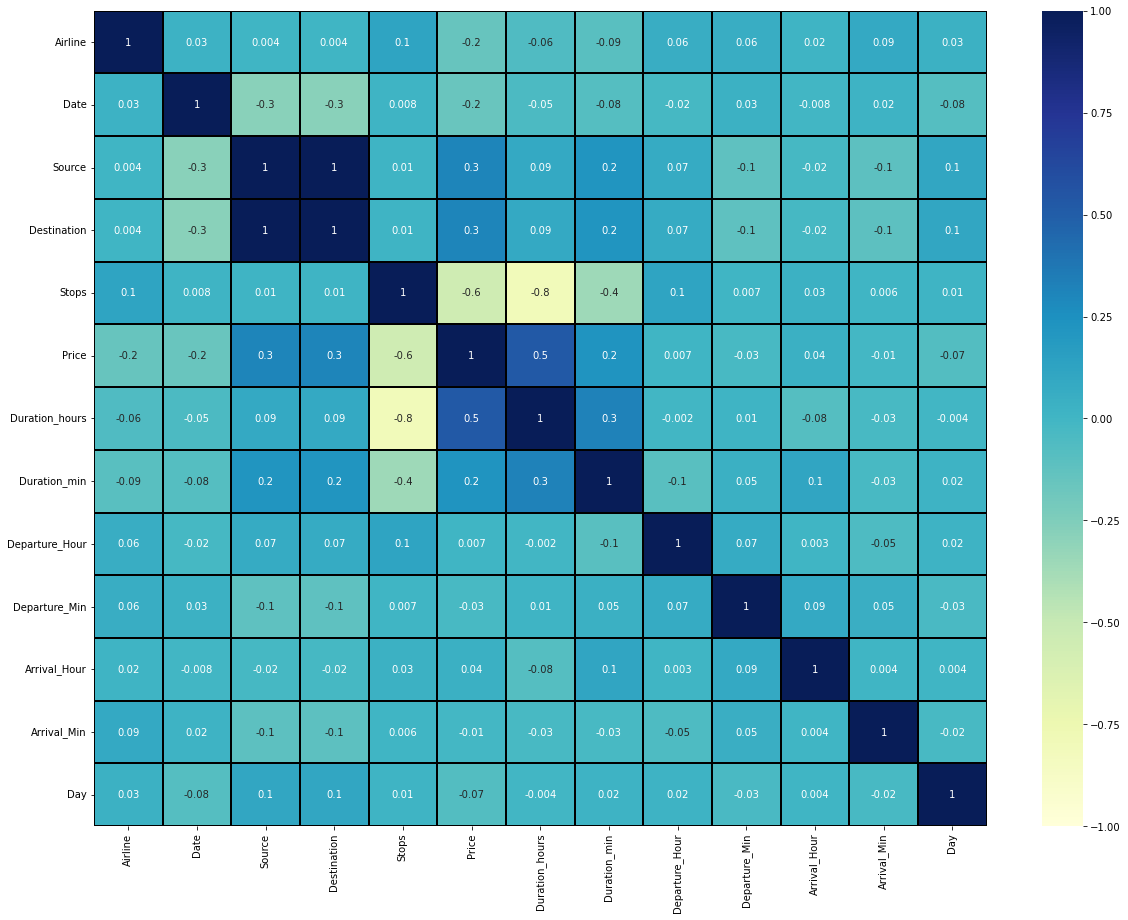

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

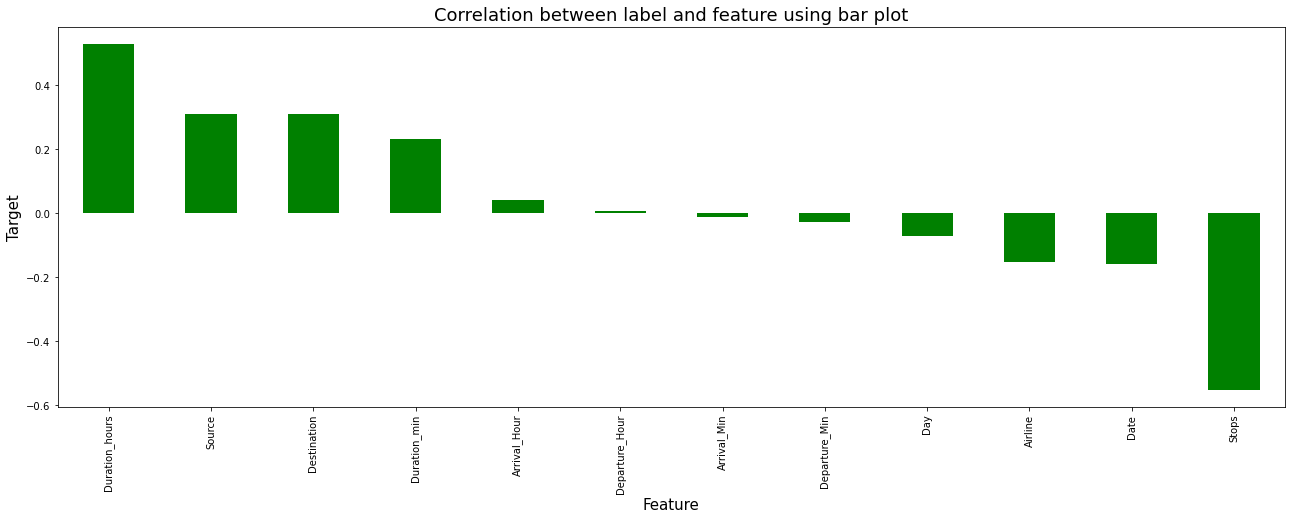

In [49]:
plt.figure(figsize=(22,7))
new_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

# Data Pre-processing:

In [50]:
X = new_df.drop('Price',axis=1)
Y = new_df['Price']

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Airline,Date,Source,Destination,Stops,Duration_hours,Duration_min,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Day
0,-0.516569,-1.511033,-0.257291,-0.257291,1.544986,-1.226584,-0.812685,-1.972077,0.785099,-1.556032,1.507061,-0.987781
1,-0.516569,-1.511033,-0.257291,-0.257291,1.544986,-1.226584,-0.812685,0.217480,0.197484,0.300553,0.929085,-0.987781
2,0.724364,-1.511033,-0.257291,-0.257291,1.544986,-1.226584,-0.812685,1.129795,-1.565360,1.074130,-0.804844,-0.987781
3,-0.516569,-1.511033,-0.257291,-0.257291,1.544986,-1.226584,-0.812685,1.312258,1.372713,1.383560,-1.382821,-0.987781
4,-0.516569,-1.511033,-0.257291,-0.257291,1.544986,-1.226584,-0.516733,0.947332,-0.390131,0.919414,0.640097,-0.987781
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1.344830,-0.651168,3.886652,3.886652,0.072713,1.145392,-0.812685,0.582406,-0.977746,-0.937171,-0.226868,0.414415
2122,1.344830,-0.651168,3.886652,3.886652,0.072713,1.922081,1.554931,0.582406,-0.977746,1.228845,-1.382821,0.414415
2123,1.344830,-0.651168,3.886652,3.886652,0.072713,1.922081,1.554931,0.582406,-0.977746,1.228845,-1.382821,0.414415
2124,1.344830,-0.651168,3.886652,3.886652,0.072713,1.672766,-0.220781,0.582406,-0.977746,0.300553,0.351108,0.414415


# Model:

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error, r2_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=.30, random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(X_train,Y_train)
    predRFR = RFR.predict(X_test)
    acc = r2_score(Y_test,predRFR)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print(f"Best accuracy is {maxAccu} on Random_state {maxRS}")

Best accuracy is 0.8064023892348862 on Random_state 96


# Train Test Split:

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=maxRS)

# Linear Regression:

In [54]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

LR=LinearRegression()
LR.fit(X_train,Y_train)
# [Prediction]
predLR = LR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predLR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predLR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predLR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predLR)))

R2 Score: 0.4674053963603567
Mean Absolute Error 1399.1656493821379
Mean Squared Error 4246427.359154695
Root Mean Squared Error 2060.6861379537386


# Linear Regression with Ridge

In [55]:
from sklearn.model_selection import GridSearchCV
paramsRidge ={'alpha':[0.01,0.1,1.0,10.26],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10.26, 'solver': 'sparse_cg'}


In [56]:
ridge = Ridge(alpha = 10.26,solver = 'sag')
ridge.fit(X_train,Y_train)
ridge.score(X_train,Y_train)
pred_ridge = ridge.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_ridge))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_ridge))
print('Mean Squared Error',mean_squared_error(Y_test,pred_ridge))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_ridge)))

R2 Score: 0.46742551760367645
Mean Absolute Error 1399.3161688595467
Mean Squared Error 4246266.930570647
Root Mean Squared Error 2060.6472115747147


# Linear Regression with Lasso

In [57]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso = Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [58]:
lasso = Lasso(alpha=1,random_state=0)
lasso.fit(X_train,Y_train)
lasso.score(X_train,Y_train)
pred_lasso = lasso.predict(X_test)
print('R2 Score:',r2_score(Y_test,pred_lasso))
print('Mean Absolute Error',mean_absolute_error(Y_test,pred_lasso))
print('Mean Squared Error',mean_squared_error(Y_test,pred_lasso))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,pred_lasso)))

R2 Score: 0.4673956928396259
Mean Absolute Error 1398.8339299982101
Mean Squared Error 4246504.726247094
Root Mean Squared Error 2060.704910036149


# Random Forest Regressor

In [59]:
RFR = RandomForestRegressor()
RFR.fit(X_train,Y_train)
# [Prediction]
predRFR = RFR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predRFR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predRFR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predRFR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predRFR)))

R2 Score: 0.8099616981587929
Mean Absolute Error 675.3003761755486
Mean Squared Error 1515193.4298827588
Root Mean Squared Error 1230.9319355198966


# Gradient Boosting Regressor

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train,Y_train)

# [Prediction]
predGB = GB.predict(X_test)
print('R2 Score:',r2_score(Y_test,predGB))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predGB))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predGB))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predGB)))

R2 Score: 0.7469635711320679
Mean Absolute Error 921.6823772594868
Mean Squared Error 2017483.4800515575
Root Mean Squared Error 1420.381455825004


# Bagging Regressor:

In [61]:
from sklearn.ensemble import BaggingRegressor
BR = BaggingRegressor()
BR.fit(X_train,Y_train)

# [Prediction]
predBR = BR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predBR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predBR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predBR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predBR)))

R2 Score: 0.738321359453614
Mean Absolute Error 754.491222570533
Mean Squared Error 2086388.6545768024
Root Mean Squared Error 1444.4336795356173


# Decision Tree Regressor:

In [62]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train,Y_train)

# [Prediction]
predDTR = DTR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predDTR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predDTR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predDTR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predDTR)))

R2 Score: 0.6916069092544959
Mean Absolute Error 728.512539184953
Mean Squared Error 2458847.4028213164
Root Mean Squared Error 1568.0712365263628


# Extra Trees Regressor:

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(X_train,Y_train)

# [Prediction]
predETR = ETR.predict(X_test)
print('R2 Score:',r2_score(Y_test,predETR))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predETR))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predETR))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predETR)))

R2 Score: 0.8096048602098009
Mean Absolute Error 641.7259090909091
Mean Squared Error 1518038.532741536
Root Mean Squared Error 1232.0870637830494


# XGB Regressor

In [71]:
from xgboost import XGBRegressor as xgb

xgb=xgb(verbosity=0)
xgb.fit(X_train,Y_train)

# prediction
predxgb=xgb.predict(X_test)
print('R2_Score:',r2_score(Y_test,predxgb))

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predxgb))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predxgb))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predxgb)))



R2_Score: 0.7551367849792562
Mean Absolute Error(MAE) 805.406704606681
Mean Squared Error(MAE) 1952317.6697790876
Root Mean Squared Error (RMSE) 1397.2536168423712


    #KNeighbors Regressor

In [65]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

# [Prediction]
predKNN = KNN.predict(X_test)
print('R2 Score:',r2_score(Y_test,predKNN))

# Mean Absolute Error(MAE)
print('Mean Absolute Error',mean_absolute_error(Y_test,predKNN))

# Mean Squared Error(MSE)
print('Mean Squared Error',mean_squared_error(Y_test,predKNN))

# Root Mean Squared Error (RMSE)
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Y_test,predKNN)))

R2 Score: 0.6460104530049144
Mean Absolute Error 1013.9184952978056
Mean Squared Error 2822392.279122257
Root Mean Squared Error 1679.9977021181478


# Cross-Validation:

In [72]:
from sklearn.model_selection import cross_val_score

# Checking cv score for Linear Regression
print('Linear Regression -->',cross_val_score(LR,X,Y,cv=5).mean())

# Checking cv score for Random Forest Regressor
print('Random Forest Regressor -->',cross_val_score(RFR,X,Y,cv=5).mean())

#Checking the cv score for GradientBoostingRegressor
print('GradientBoostingRegressor -->',cross_val_score(GB,X,Y,cv=5).mean())

#Checking the cv score for BaggingRegressor
print('BaggingRegressor -->',cross_val_score(BR,X,Y,cv=5).mean())

# Checking cv score for Decision Tree Regressor
print('Decision Tree Regressor -->',cross_val_score(DTR,X,Y,cv=5).mean())

# Checking cv score for ExtraTrees Regressor
print('ExtraTrees Regressor -->',cross_val_score(ETR,X,Y,cv=5).mean())

# Checking cv score for XGBRegressor
print('XGBRegressor:',cross_val_score(xgb,X,Y,cv=5).mean())
print('KNeighborsRegressor:',cross_val_score(KNN,X,Y,cv=5).mean())

Linear Regression --> 0.35382264499329985
Random Forest Regressor --> 0.5266228302762664
GradientBoostingRegressor --> 0.49709879939854795
BaggingRegressor --> 0.4733707216272345
Decision Tree Regressor --> -0.0017763556048612018
ExtraTrees Regressor --> 0.4831596718810388
XGBRegressor: 0.5133760621709278
KNeighborsRegressor: 0.4621912372572293


# Hyper Parameter Tuning:

In [67]:
parameters = {'n_estimators' : [50,100,200, 400],
              'gamma' : np.arange(0,0.5,0.1),
              'max_depth' : [4, 6, 8,10],
              'n_jobs' : [-2, -1, 1]}

In [70]:
!Pip install xgboost

In [ ]:
from sklearn.model_selection import GridSearchCV
GCV = GridSearchCV(xgb,parameters,cv=5)
GCV.fit(X_train,Y_train)

In [ ]:
GCV.best_params_

In [ ]:
from xgboost import XGBRegressor as xgb
Fare = xgb(gamma=0.0, max_depth=4, n_estimators=400, n_jobs=-2)
Fare.fit(X_train, Y_train)

# prediction
predFare=Fare.predict(X_test)
print('R2_Score:',r2_score(Y_test,predFare)*100)

# Mean Absolute Error(MAE)
print('Mean Absolute Error(MAE)',mean_absolute_error(Y_test, predFare))

# Mean Squared Error(MSE)
print('Mean Squared Error(MAE)',mean_squared_error(Y_test, predFare))

# Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE)",np.sqrt(mean_squared_error(Y_test, predFare)))
